## The Sparks Foundation

### Task 2 - Prediction using Unsupervised Machine Learning

<i><b>From the given 'iris' dataset, predict the optimum number of clusters and represent it visually</b></i>

<b>Submitted by: SUSMA R</b>

In [1]:
# Importing the required libraries in this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

import warnings as wg
wg.filterwarnings('ignore')

<b>Import the dataset</b>

In [2]:
data = pd.read_csv("C:/Users/USER/Downloads/Iris.csv")
print("Dataset imported successfully")

Dataset imported successfully


<b>Quick view about dataset</b>

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.shape

(150, 6)

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.drop('Id',axis = 1,inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# check for duplicate rows

data.duplicated().sum()

3

In [10]:
# Dropping the duplicate rows

data.drop_duplicates(inplace=True)
data.shape[0]

147

Text(0, 0.5, 'Count')

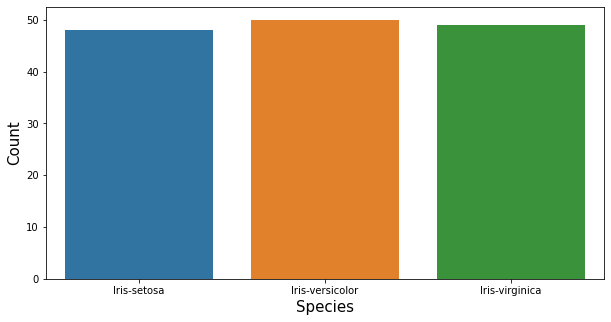

In [11]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = 'Species',data=data)
plt.xlabel('Species',fontsize=15)
plt.ylabel('Count',fontsize=15)

<B>Data Visualization</B>

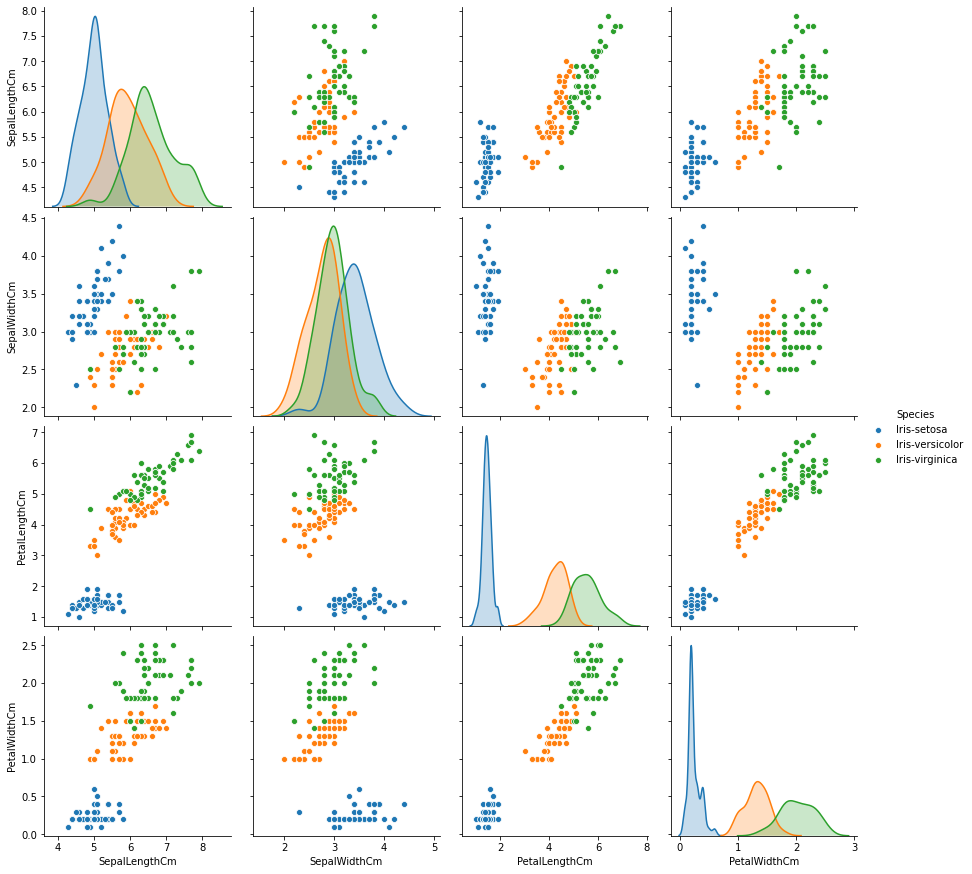

In [12]:
plt.close();
sns.pairplot(data,vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],hue="Species",size=3);
plt.show()

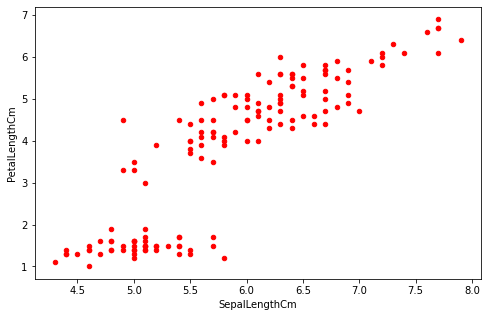

In [13]:
data.plot(kind='scatter', x='SepalLengthCm', y='PetalLengthCm',color='red',figsize=[8,5])
plt.show()

In [14]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


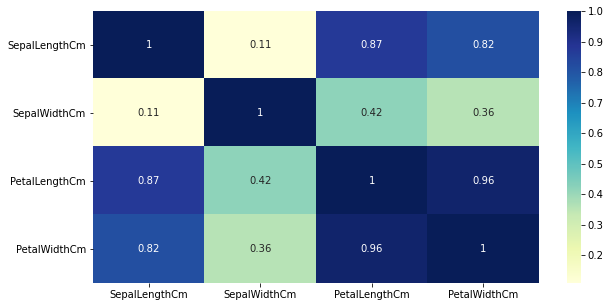

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()),cmap='YlGnBu',annot=True);

<b> Finding optimum number of clusters for K Means classification using Elbow method</b> 

In [15]:
# Dividing data into independent and dependent features

x=data.iloc[:,[1,4]].values

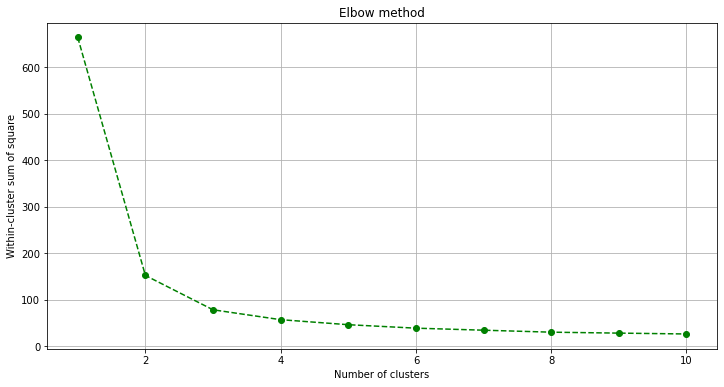

In [16]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss,'go--')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

<i>From the above graph, the optimum cluster is where the elbow occurs. The WCSS doesn't decrease significantly with every iteration.
We can see that after 3 the drops in WCSS is minimal. So we choose '3' as the optimal number of clusters.</i>

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0
 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2]


In [34]:
kmeans = KMeans(n_clusters = 3,init='k-means++')
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.90327869, 2.74918033, 4.38196721, 1.42622951],
       [5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [18]:
data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
109,7.2,3.6,6.1,2.5,Iris-virginica
31,5.4,3.4,1.5,0.4,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
148,6.2,3.4,5.4,2.3,Iris-virginica
96,5.7,2.9,4.2,1.3,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica


<b> Visualization of clusters</b>

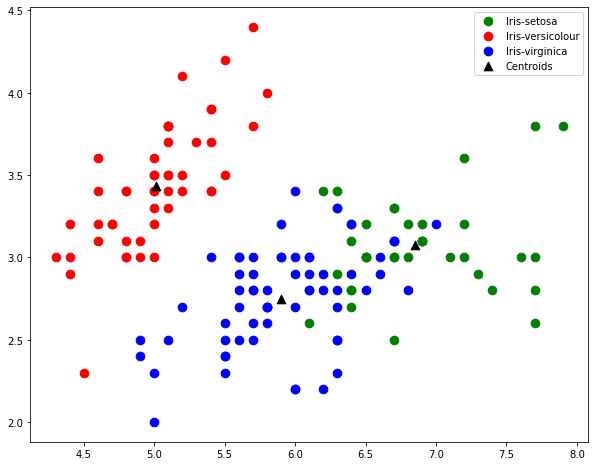

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 75, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 75, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 75, c = 'blue', label = 'Iris-virginica')

# Plotting the clusters centroids

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 75, c = 'black', label = 'Centroids',marker='^')

plt.legend()
plt.show()

### Thank You